A very simple notebook that use PeriodicStarMetric in  a group of selected galaxies (with different distance modulus) to compute the recovery fraction of type ab, type c Rr Lyrae and delta scuti. Mean magnitudes are taken from LMC light curves observed within OGLE and trasformed in LSST photometrical  bands 

In [20]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import pandas as pd
import mafContrib
from mafContrib import PeriodicStarMetric 
from mafContrib  import TransientAsciiMetric

In [21]:
runName = 'baseline2018a'
dbFile = 'baseline2018a.db'
opsdb = db.OpsimDatabase(dbFile)


mjdcol = 'observationStartMJD'
degrees = True

outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

In [75]:
#Typical periods and amplitude for type c RR Lyrae
#RP_RRc = {0.3,0.32,0.35}
#RA_RRc = {0.3,0.3,0.27}
#compute absolute magnitudes  in ugrizy of RRc from OGLE observations in Magellanic Clouds (and we assume 18.5 and 0.08 for the distance modulus and reddening of LMC ).
I_rrc_lmc = 18.9
V_rrc_lmc = 19.2
Vi = V_rrc_lmc - (2.742 * 0.08) - 18.5   
Ii = I_rrc_lmc - (1.505 * 0.08) - 18.5

ii_rrc = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi_rrc = ii_rrc+ 1.481*(Vi-Ii) - 0.536
ri_rrc = (1/0.565) * (Vi-0.435*gi_rrc + 0.016)
ui_rrc = gi_rrc + 0.575
zi_rrc = ii_rrc - 0.013
yi_rrc = zi_rrc

ra=(283.763,15.038,100.402,39.997,27.776,143.888)
dec=(-30.478,-33.709,-50.966,-34.449,-44.444,-36.767)

nmod = 6
distMod = np.arange(0, nmod)
distMod = (17.13,19.57,20.08,20.70,23.20,20.56)


plotDict = {'colorMin': 0, 'colorMax': 1, 'xMin': 0, 'xMax': 1}

ra = np.repeat(ra, nmod)
dec = np.repeat(dec, nmod)
distMod = np.tile(distMod, nmod)

metric = PeriodicStarMetric(period=0.3, amplitude=0.3, phase=2.,
                            nMonte=100, periodTol=0.001, ampTol=0.005, means=[ui_rrc,gi_rrc,ri_rrc,ii_rrc,zi_rrc,yi_rrc],
                            magTol=0.01, nBands=3)
year_start=0
year_finish=2
sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
slicer.slicePoints['distMod'] = distMod

bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database SummaryAllProps with constraint night between 0 and 730 for columns ['filter', 'observationStartMJD', 'fieldRA', 'fieldDec', 'fiveSigmaDepth']
Found 453105 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night between 0 and 730" constraint now.
Plotting complete.
RA,  Dec, m-M, Fraction detected
283.763 -30.478 17.13 1.0
283.763 -30.478 19.57 0.98
283.763 -30.478 20.08 0.87
283.763 -30.478 20.7 0.76
283.763 -30.478 23.2 0.36
283.763 -30.478 20.56 0.81
15.038 -33.709 17.13 1.0
15.038 -33.709 19.57 1.0
15.038 -33.709 20.08 0.88
15.038 -33.709 20.7 0.75
15.038 -33.709 23.2 0.52
15.038 -33.709 20.56 0.92
100.402 -50.966 17.13 1.0
100.402 -50.966 19.57 0.99
100.402 -50.966 20.08 0.94
100.402 -50.966 20.7 0.76
100.402 -50.966 23.2 0.5
100.402 -50.966 20.56 0.75
39.997 -34.449 17.13 1.0
39.997 -34.449 19.57 1.0
39.997 -34.449 20.08 0.94
39.997 -34.449 20.7 0.82
39.997 -34.449 23.2 0.45
39

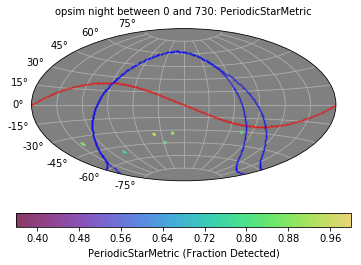

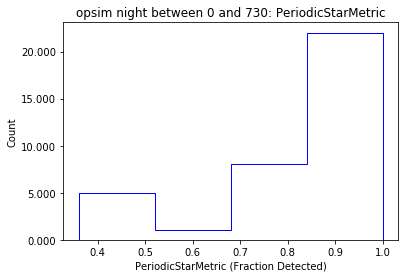

In [76]:
bg.runAll()
bg.plotAll(closefigs=False)
print('RA,  Dec, m-M, Fraction detected')
for i, dummy in enumerate(ra):
    print(ra[i], dec[i], distMod[i], bundle.metricValues[i])

In [73]:
#Typical periods and amplitude for Delta Scuti
#P_dS = {0.02 0.03 0.05 0.08 0.12 0.2}
#A_dS = {0.02 0.04 0.08 0.10 0.12 0.14 0.16 0.18 0.2}
#V_dS_lmc = {22.25 21.72 21.20 20.67 20.14 19.61}
#I_dS_lmc = {21.75 21.22 20.7 20.17 19.64 19.11}

I_DS_lmc = 19.61
V_DS_lmc = 19.11

Vi = V_DS_lmc - (2.742 * 0.08) - 18.5   
Ii = I_DS_lmc - (1.505 * 0.08) - 18.5

ii = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi = ii+ 1.481*(Vi-Ii) - 0.536
ri = (1/0.565) * (Vi-0.435*gi + 0.016)
ui = gi + 0.575
zi = ii - 0.013
yi = zi


ra=(283.763,15.038,100.402,39.997,27.776,143.888)
dec=(-30.478,-33.709,-50.966,-34.449,-44.444,-36.767)

nmod = 6
distMod = np.arange(0, nmod)
distMod = (17.13,19.57,20.08,20.70,23.20,20.56)
# M54 :      mu=17.13  E(B-v)=0.15
#  Sculptor : mu=19.57  E(B-V)=0.016
#  Fornax :   mu=20.70  E(B-V)=0.02
#  Phoenix :  mu=23.10  E(B-V)=0.014
#  Carina  :  mu=20.08  E(B-V)=0.05
#  Antlia 2:  mu=20.56  E(B-V)=0.19


ra = np.repeat(ra, nmod)
dec = np.repeat(dec, nmod)
distMod = np.tile(distMod, nmod)

metric = PeriodicStarMetric(period=0.2, amplitude=0.2, phase=2.,
                            nMonte=100, periodTol=0.001, ampTol=0.005, means=[ui,gi,ri,ii,zi,yi],
                            magTol=0.01, nBands=3)
year_start=0
year_finish=4
sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)
#sql = 'night < 365*2 and filter="g"'

slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
slicer.slicePoints['distMod'] = distMod
plotDict = {'colorMin': 0, 'colorMax': 1, 'xMin': 0, 'xMax': 1}
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database SummaryAllProps with constraint night between 0 and 1461 for columns ['filter', 'observationStartMJD', 'fieldRA', 'fieldDec', 'fiveSigmaDepth']
Found 941480 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night between 0 and 1461" constraint now.
Plotting complete.
RA,  Dec, m-M, Fraction detected
283.763 -30.478 17.13 1.0
283.763 -30.478 19.57 1.0
283.763 -30.478 20.08 0.96
283.763 -30.478 20.7 0.76
283.763 -30.478 23.2 0.48
283.763 -30.478 20.56 0.83
15.038 -33.709 17.13 1.0
15.038 -33.709 19.57 0.99
15.038 -33.709 20.08 0.98
15.038 -33.709 20.7 0.86
15.038 -33.709 23.2 0.61
15.038 -33.709 20.56 0.93
100.402 -50.966 17.13 1.0
100.402 -50.966 19.57 0.97
100.402 -50.966 20.08 0.94
100.402 -50.966 20.7 0.76
100.402 -50.966 23.2 0.43
100.402 -50.966 20.56 0.85
39.997 -34.449 17.13 1.0
39.997 -34.449 19.57 1.0
39.997 -34.449 20.08 0.97
39.997 -34.449 20.7 0.88
39.997 -34.449 23.2 0.46

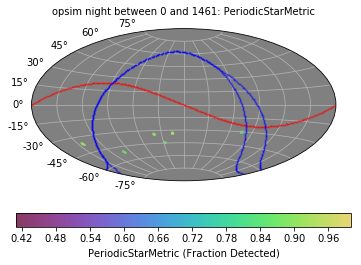

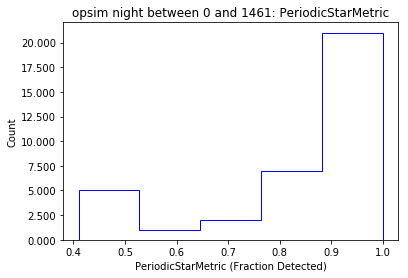

In [74]:
bg.runAll()
bg.plotAll(closefigs=False)
print('RA,  Dec, m-M, Fraction detected')
for i, dummy in enumerate(ra):
    print(ra[i], dec[i], distMod[i], bundle.metricValues[i])

In [69]:
#Recovery of RRa
#P_RRab = {0.48 0.52 0.56 0.62 0.68}
#A_RRab = {0.85 0.70 0.55 0.40 0.25}
#AI_RRab_lmc = {19 19 18.9 18.9 18.8}
#AV_RRab_lmc = {19.4 19.4 19.4 19.4 19.4}

I_RRab_lmc = 18.9
V_RRab_lmc = 19.4

Vi = V_RRab_lmc - (2.742 * 0.08) - 18.5   
Ii = I_RRab_lmc - (1.505 * 0.08) - 18.5

ii_rrab = Ii + 0.386*0.013 + 0.397  # 0.013 = (i-z)_0
gi_rrab = ii+ 1.481*(Vi-Ii) - 0.536
ri_rrab = (1/0.565) * (Vi-0.435*gi + 0.016)
ui_rrab = gi + 0.575
zi_rrab = ii - 0.013
yi_rrab = zi

ra=(283.763,15.038,100.402,39.997,27.776,143.888)
dec=(-30.478,-33.709,-50.966,-34.449,-44.444,-36.767)

nmod = 6
distMod = np.arange(0, nmod)
distMod = (17.13,19.57,20.08,20.70,23.20,20.56)
# M54 :      mu=17.13  E(B-v)=0.15
#  Sculptor : mu=19.57  E(B-V)=0.016
#  Fornax :   mu=20.70  E(B-V)=0.02
#  Phoenix :  mu=23.10  E(B-V)=0.014
#  Carina  :  mu=20.08  E(B-V)=0.05
#  Antlia 2:  mu=20.56  E(B-V)=0.19


ra = np.repeat(ra, nmod)
dec = np.repeat(dec, nmod)
distMod = np.tile(distMod, nmod)

metric = PeriodicStarMetric(period=0.48, amplitude=0.85, phase=2.,
                            nMonte=100, periodTol=0.001, ampTol=0.005, means=[ui_rrab,gi_rrab,ri_rrab,ii_rrab,zi_rrab,yi_rrab],
                            magTol=0.01, nBands=3)
year_start=0
year_finish=2
#sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)
sql = 'night < 365*2'

slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
slicer.slicePoints['distMod'] = distMod

bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database SummaryAllProps with constraint night < 365*2 for columns ['filter', 'observationStartMJD', 'fieldRA', 'fieldDec', 'fiveSigmaDepth']
Found 452269 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365*2" constraint now.
Plotting complete.
RA,  Dec, m-M, Fraction detected
283.763 -30.478 17.13 1.0
283.763 -30.478 19.57 1.0
283.763 -30.478 20.08 0.94
283.763 -30.478 20.7 0.91
283.763 -30.478 23.2 0.51
283.763 -30.478 20.56 0.96
15.038 -33.709 17.13 1.0
15.038 -33.709 19.57 1.0
15.038 -33.709 20.08 1.0
15.038 -33.709 20.7 0.89
15.038 -33.709 23.2 0.52
15.038 -33.709 20.56 0.92
100.402 -50.966 17.13 1.0
100.402 -50.966 19.57 1.0
100.402 -50.966 20.08 0.96
100.402 -50.966 20.7 0.88
100.402 -50.966 23.2 0.4
100.402 -50.966 20.56 0.95
39.997 -34.449 17.13 1.0
39.997 -34.449 19.57 1.0
39.997 -34.449 20.08 1.0
39.997 -34.449 20.7 0.95
39.997 -34.449 23.2 0.47
39.997 -34.449 20.56 0.99


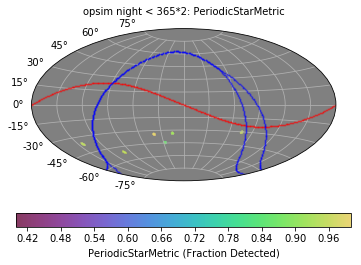

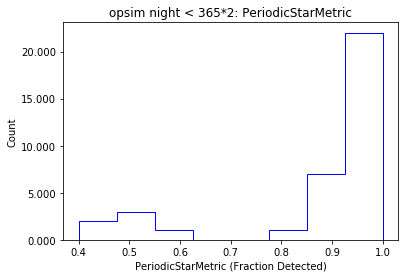

In [70]:
bg.runAll()
bg.plotAll(closefigs=False)
print('RA,  Dec, m-M, Fraction detected')
for i, dummy in enumerate(ra):
    print(ra[i], dec[i], distMod[i], bundle.metricValues[i])